# Example 5.6

MH sampler for a Gaussian with an independent proposal.

/var/folders/d8/86whr2t12h70n511w7s7cm_w0000gn/T/ipykernel_21629/3241402519.py:33: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x[n] = x_s


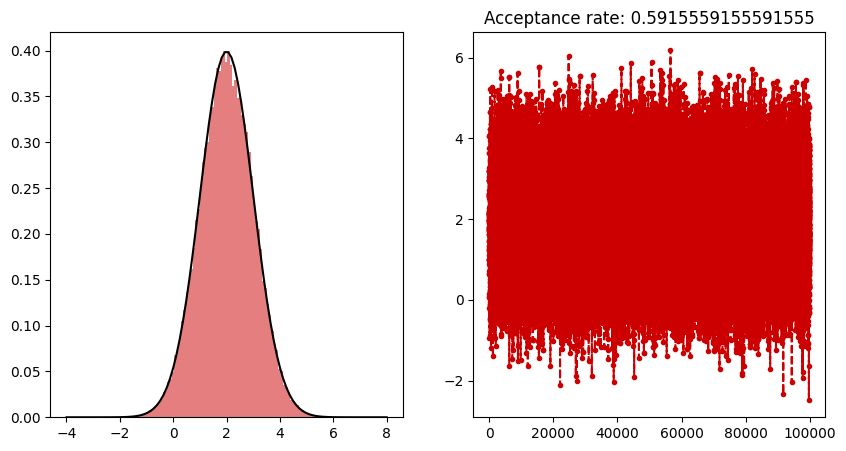

In [6]:
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(42)

def p(x, mu, sigma): # just for plotting purposes
    return 1/np.sqrt(2*np.pi * sigma**2) * np.exp(-(x-mu)**2/(2*sigma**2))

def logp(x, mu, sigma):
    return -(x-mu)**2/(2*sigma**2) - np.log(np.sqrt(2*np.pi * sigma**2))

def logq(x, mu_q, sigma_q):
    return -(x-mu_q)**2/(2*sigma_q**2) - np.log(np.sqrt(2*np.pi * sigma_q**2))

def log_r(x, x_p, mu, sigma, mu_q, sigma_q):
    return logp(x_p, mu, sigma) - logp(x, mu, sigma) - logq(x_p, mu_q, sigma_q) + logq(x, mu_q, sigma_q)

fig = plt.figure(figsize=(10, 5))
N = 100000

mu = 2
sigma = 1
mu_q = 2
sigma_q = 2
x = np.zeros(N)
x[0] = 10

acc = 0

for n in range(1, N):
    x_s = rng.normal(mu_q, sigma_q, 1)
    u = rng.uniform(0, 1, 1)

    if np.log(u) < log_r(x[n-1], x_s, mu, sigma, mu_q, sigma_q):
        x[n] = x_s
        acc += 1
    else:
        x[n] = x[n-1]

burnin = 100
plt.clf()
plt.subplot(1,2,1)
plt.hist(x[burnin:], bins=100, density=True, color=[0.8, 0, 0], alpha=0.5)
plt.plot(np.linspace(-4, 8, 100), p(np.linspace(-4, 8, 100), mu, sigma), label='p', color='k')
plt.subplot(1,2,2)
plt.plot(x[burnin:n], '.--', color=[0.8, 0, 0])
plt.title('Acceptance rate: ' + str(acc/n))
plt.show(block=False)
plt.pause(0.1)

Play with the above code changing burnin and initial points as well as proposal variance.